특성 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
타깃 이름: ['setosa' 'versicolor' 'virginica']
데이터 크기: (150,)
모델 정확도 (Accuracy): 1.0


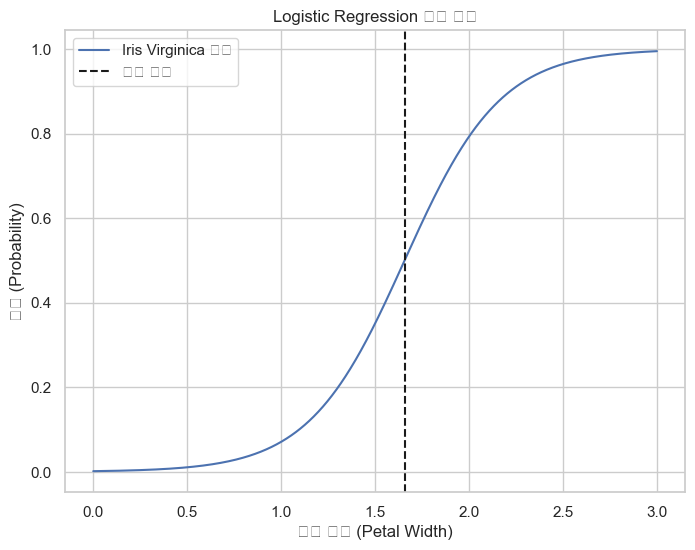

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

# 1. 데이터 준비
# 데이터 로드
iris = load_iris()
X = iris['data'][:, 3]  # 꽃잎 너비 (petal width)
y = (iris['target'] == 2).astype(int)  # Iris Virginica 여부 이진화

# 데이터 정보 출력
print("특성 이름:", iris['feature_names'])
print("타깃 이름:", iris['target_names'])
print("데이터 크기:", X.shape)

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X.reshape(-1, 1), y, test_size=0.2, random_state=42
)

# 3. 모델 학습 / 예측 및 평가
# 모델 정의
model = LogisticRegression()
# 모델 학습
model.fit(X_train, y_train)
# 예측 수행
y_pred = model.predict(X_test)
# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("모델 정확도 (Accuracy):", accuracy)

# 4. 결정 경계 시각화
# X의 값 범위에서 1000개의 점으로 확률 계산
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = model.predict_proba(X_new)[:, 1]

# 결정 경계 계산 (확률이 0.5인 지점)
decision_boundary = X_new[np.argmax(y_proba >= 0.5)]

# 그래프 시각화
plt.figure(figsize=(8, 6))
plt.plot(X_new, y_proba, "b-", label="Iris Virginica 확률")
plt.axvline(x=decision_boundary, color="k", linestyle="--", label="결정 경계")
plt.title("Logistic Regression 결정 경계")
plt.xlabel("꽃잎 너비 (Petal Width)")
plt.ylabel("확률 (Probability)")
plt.legend()
plt.show()
